In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

In [2]:
path_dir = '/Users/skylark/Desktop/dataset'

In [129]:
train_img = pd.read_csv('/Users/skylark/Desktop/dataset/train.csv')

In [312]:
test_img = pd.read_csv('/Users/skylark/Desktop/dataset/test.csv')

In [51]:
from sklearn.preprocessing import LabelEncoder

In [131]:
le = LabelEncoder()
le.fit_transform(train_img.target)

array([4, 0, 6, 2, 6, 1, 7, 3, 7, 3, 3, 3, 1, 7, 2, 6, 7, 3, 4, 1, 4, 0,
       3, 3, 5, 6, 1, 6, 6, 7, 2, 1, 2, 7, 0, 1, 0, 2, 6, 6, 6, 3, 4, 5,
       5, 6, 1, 4, 1, 5, 6, 7, 7, 6, 3, 7, 5, 4, 7, 1, 6, 7, 4, 2, 7, 2,
       4, 0, 1, 1, 7, 0, 2, 1, 5, 4, 1, 3, 6, 3, 0, 3, 0, 7, 1, 3, 5, 4,
       5, 0, 6, 3, 6, 3, 0, 5, 0, 0, 7, 1, 2, 5, 7, 0, 6, 1, 7, 7, 3, 6,
       1, 4, 2, 0, 5, 2, 3, 4, 5, 0, 5, 1, 2, 3, 0, 5, 0, 5, 2, 0, 5, 0,
       4, 4, 7, 5, 7, 0, 6, 5, 6, 5, 2, 6, 7, 0, 5, 6, 7, 4, 7, 7, 1, 6,
       2, 0, 5, 1, 3, 4, 7, 2, 5, 2, 1, 7, 5, 0, 0, 3, 6, 1, 6, 3, 5, 3,
       6, 7, 0, 0, 2, 6, 5, 4, 6, 2, 5, 5, 3, 1, 5, 4, 6, 6, 3, 2, 0, 2,
       5, 0, 2, 5, 6, 4, 3, 0, 7, 3, 2, 5, 2, 7, 5, 1, 3, 5, 3, 7, 5, 1,
       5, 7, 6, 1, 1, 2, 5, 5, 7, 1, 0, 1, 4, 2, 7, 4, 3, 4, 1, 0, 1, 3,
       2, 2, 6, 3, 0, 2, 3, 2, 6, 0, 7, 7, 1, 0, 6, 7, 0, 6, 7, 5, 2, 2,
       3, 3, 6, 4, 6, 7, 1, 6, 4, 0, 3, 0, 7, 5, 4, 0, 2, 5, 0, 1, 2, 3,
       0, 2, 5, 2, 3, 7, 7, 5, 2, 7, 7, 3, 4, 2, 4,

In [138]:
def to_str(x):
    return int(x.split('.')[0])

In [140]:
train_img['img'] = train_img.Image.apply(lambda x: to_str(x))

In [151]:
test_img['img'] = test_img.Image.apply(lambda x: to_str(x))

In [80]:
dance_dict

{1: 'kathak',
 4: 'manipuri',
 0: 'bharatanatyam',
 2: 'kathakali',
 5: 'mohiniyattam',
 7: 'sattriya',
 3: 'kuchipudi',
 6: 'odissi'}

In [132]:
train_img['label'] = le.fit_transform(train_img.target)

In [5]:
train_dir = os.path.join(path_dir, 'train')
test_dir = os.path.join(path_dir, 'test')

In [8]:
from tensorflow.keras import models, layers

In [289]:
model = models.Sequential()
from keras import regularizers

In [290]:
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 1)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 256)      

In [240]:
from sklearn.model_selection import train_test_split

In [284]:
train_x, test_x, train_y, test_y = train_test_split(np.array(train), train_img.label, test_size = 0.3, random_state=89)

In [292]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.preprocessing import image

In [286]:
train_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=50, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=50, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = image.ImageDataGenerator(rescale=1./255, rotation_range=50, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [287]:
train_gen = train_datagen.flow(train_x[72:], train_y[72:], batch_size=32)
test_gen = test_datagen.flow(test_x, test_y, batch_size=32)
validation_gen = validation_datagen.flow(train_x[:72],train_y[:72], batch_size=32)

In [146]:
train = []
for i in range(len(train_img)):
    train.append(image.img_to_array(image.load_img(os.path.join(train_dir, train_img.Image[i]), target_size=(150, 150), grayscale=True)))

In [176]:
test = []
for i in range(len(test_img)):
    test.append(image.img_to_array(image.load_img(os.path.join(test_dir, test_img.Image[i]), target_size=(150, 150), grayscale=True)))

In [293]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=20, validation_data=validation_gen, validation_steps=100)

Epoch 1/20
100/100 [==============================] - 261s 3s/step - loss: 2.0597 - accuracy: 0.1601 - val_loss: 1.9941 - val_accuracy: 0.2292
Epoch 2/20
100/100 [==============================] - 211s 2s/step - loss: 1.8921 - accuracy: 0.2747 - val_loss: 1.9625 - val_accuracy: 0.2189
Epoch 3/20
100/100 [==============================] - 189s 2s/step - loss: 1.7001 - accuracy: 0.3465 - val_loss: 1.8532 - val_accuracy: 0.3164
Epoch 4/20
100/100 [==============================] - 219s 2s/step - loss: 1.5234 - accuracy: 0.4152 - val_loss: 1.9797 - val_accuracy: 0.3289
Epoch 5/20
100/100 [==============================] - 208s 2s/step - loss: 1.4127 - accuracy: 0.4868 - val_loss: 4.2186 - val_accuracy: 0.2326
Epoch 6/20
100/100 [==============================] - 193s 2s/step - loss: 1.2778 - accuracy: 0.5276 - val_loss: 1.8794 - val_accuracy: 0.3933
Epoch 7/20
100/100 [==============================] - 434s 4s/step - loss: 1.1567 - accuracy: 0.5733 - val_loss: 2.3900 - val_accuracy: 0.2782

In [294]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [295]:
loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [296]:
range(1, len(loss)+1)

range(1, 21)

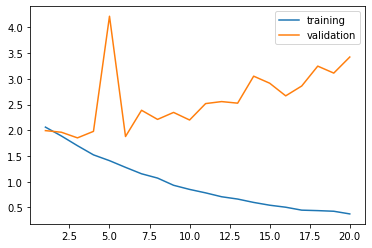

In [297]:
plt.plot(range(1,21), loss, label='training')
plt.plot(range(1,21), val_loss, label='validation')
plt.legend()
plt.show()

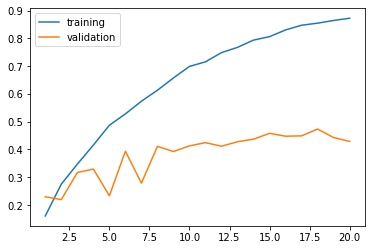

In [298]:
plt.plot(range(1,21), acc, label='training')
plt.plot(range(1,21), val_acc, label='validation')
plt.legend()
plt.show()

In [299]:
model.fit_generator(train_gen, steps_per_epoch=100, epochs=3, validation_data=validation_gen, validation_steps=50)

Epoch 1/3
100/100 [==============================] - 154s 2s/step - loss: 0.3292 - accuracy: 0.8914 - val_loss: 3.7662 - val_accuracy: 0.4433
Epoch 2/3
100/100 [==============================] - 275s 3s/step - loss: 0.3311 - accuracy: 0.8914 - val_loss: 3.7469 - val_accuracy: 0.4704
Epoch 3/3
100/100 [==============================] - 178s 2s/step - loss: 0.3212 - accuracy: 0.9003 - val_loss: 3.4655 - val_accuracy: 0.3997


In [300]:
model.evaluate_generator(test_gen)

[3.114345133304596, 0.42727274]

In [307]:
pred = model.predict_classes((np.array(test)/255))

In [308]:
pred

array([6, 0, 6, 5, 6, 7, 1, 1, 1, 1, 0, 2, 1, 0, 3, 4, 0, 0, 1, 7, 0, 0,
       1, 4, 2, 3, 3, 1, 0, 3, 0, 6, 6, 1, 1, 0, 1, 1, 6, 0, 6, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 5, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 0, 2, 1, 1, 4, 5, 5, 2, 5, 5, 5, 6, 7, 0, 7, 5, 1, 4, 5, 7,
       7, 1, 1, 7, 0, 7, 5, 0, 6, 0, 4, 7, 7, 2, 7, 5, 6, 0, 0, 4, 7, 3,
       0, 3, 3, 3, 1, 0, 0, 0, 0, 4, 5, 2, 0, 3, 3, 3, 0, 5, 6, 6, 5, 6,
       6, 0, 5, 6, 7, 0, 0, 1, 5, 0, 6, 6, 6, 6, 1, 3, 0, 6, 3, 1, 0, 0,
       1, 0])

In [314]:
test_res = test_img.copy()

In [323]:
test_res['img'] = pd.to_numeric(test_res.img)

In [330]:
test_res.sort_values('img', inplace=True)

In [332]:
test_res['label'] = pred

In [335]:
test_res['target'] = test_res.label.apply(lambda x: dance_dict[x])

In [345]:
test_res.sort_index(inplace=True)

In [348]:
test_res.drop(['img', 'label'], axis=1,inplace=True)

In [351]:
test_res.set_index('Image').to_csv('/Users/skylark/Desktop/dataset/result32.csv')